# Drought data generator

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import ema_workbench
from ema_workbench import (Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator, ema_logging)

In [7]:
from AMG_function import AMG_model_function


#Setting the stage
n_scenarios = 100000
seed=1234
dataset_name = f"{n_scenarios} scenarios - seed {seed}"

ema_logging.log_to_stderr(ema_logging.INFO)

ZA_names = ["PP1", "PP2", "PP3", "Toluquilla", "Pozos"]

#instantiate the model
AMG_model = Model("AMGmodel", function = AMG_model_function)

#Levers

AMG_model.levers = []

low_flow =0
high_flow= 1.5
maximum_flows = {"chapala": 7.6, "calderon":1.3, "zapotillo":1, "pozos":2.5, "toluquilla":1} #modify zapotillo and calderon to one system to handle max better and simplify?
AMG_model.uncertainties = [RealParameter('chapala_flow',low_flow,maximum_flows["chapala"]),
                           RealParameter('calderon_flow',low_flow,maximum_flows["calderon"]),
                           RealParameter('zapotillo_flow',low_flow,maximum_flows["zapotillo"]),
                           RealParameter('pozos_flow',low_flow,maximum_flows["pozos"]),
                           RealParameter('toluquilla_flow',low_flow,maximum_flows["toluquilla"])]

'''#Outcomes
if info_indicator != "":
    info_outcomes = [f"{info_indicator}_{ZA}" for ZA in ZA_names]
else: info_outcomes = []'''


#AMG_model.outcomes = [ScalarOutcome(info_outcome, kind=ScalarOutcome.INFO) for info_outcome in info_outcomes]

'#Outcomes\nif info_indicator != "":\n    info_outcomes = [f"{info_indicator}_{ZA}" for ZA in ZA_names]\nelse: info_outcomes = []'

In [8]:
ema_logging.log_to_stderr(ema_logging.INFO)


with MultiprocessingEvaluator(AMG_model, n_processes=-1) as evaluator:
    np.random.seed(seed)
    scenarios_data = evaluator.perform_experiments(n_scenarios)

import seaborn as sns

main_scenarios_df = scenarios_data[0]

main_scenarios_df.head()

[MainProcess/INFO] pool started with 7 workers
[MainProcess/INFO] performing 100000 scenarios * 1 policies * 1 model(s) = 100000 experiments
100%|████████████████████████████████| 100000/100000 [01:16<00:00, 1313.33it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


,calderon_flow,chapala_flow,pozos_flow,toluquilla_flow,zapotillo_flow,scenario,policy,model
0,0.175556,7.534851,0.220985,0.708835,0.130138,100000,None,AMGmodel
1,0.943796,6.091737,0.946994,0.278820,0.493844,100001,None,AMGmodel
2,0.548830,1.738964,1.216075,0.795866,0.953910,100002,None,AMGmodel
3,1.269454,5.303146,1.726996,0.279622,0.506761,100003,None,AMGmodel
4,1.288571,5.964803,0.471158,0.207121,0.010830,100004,None,AMGmodel


c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


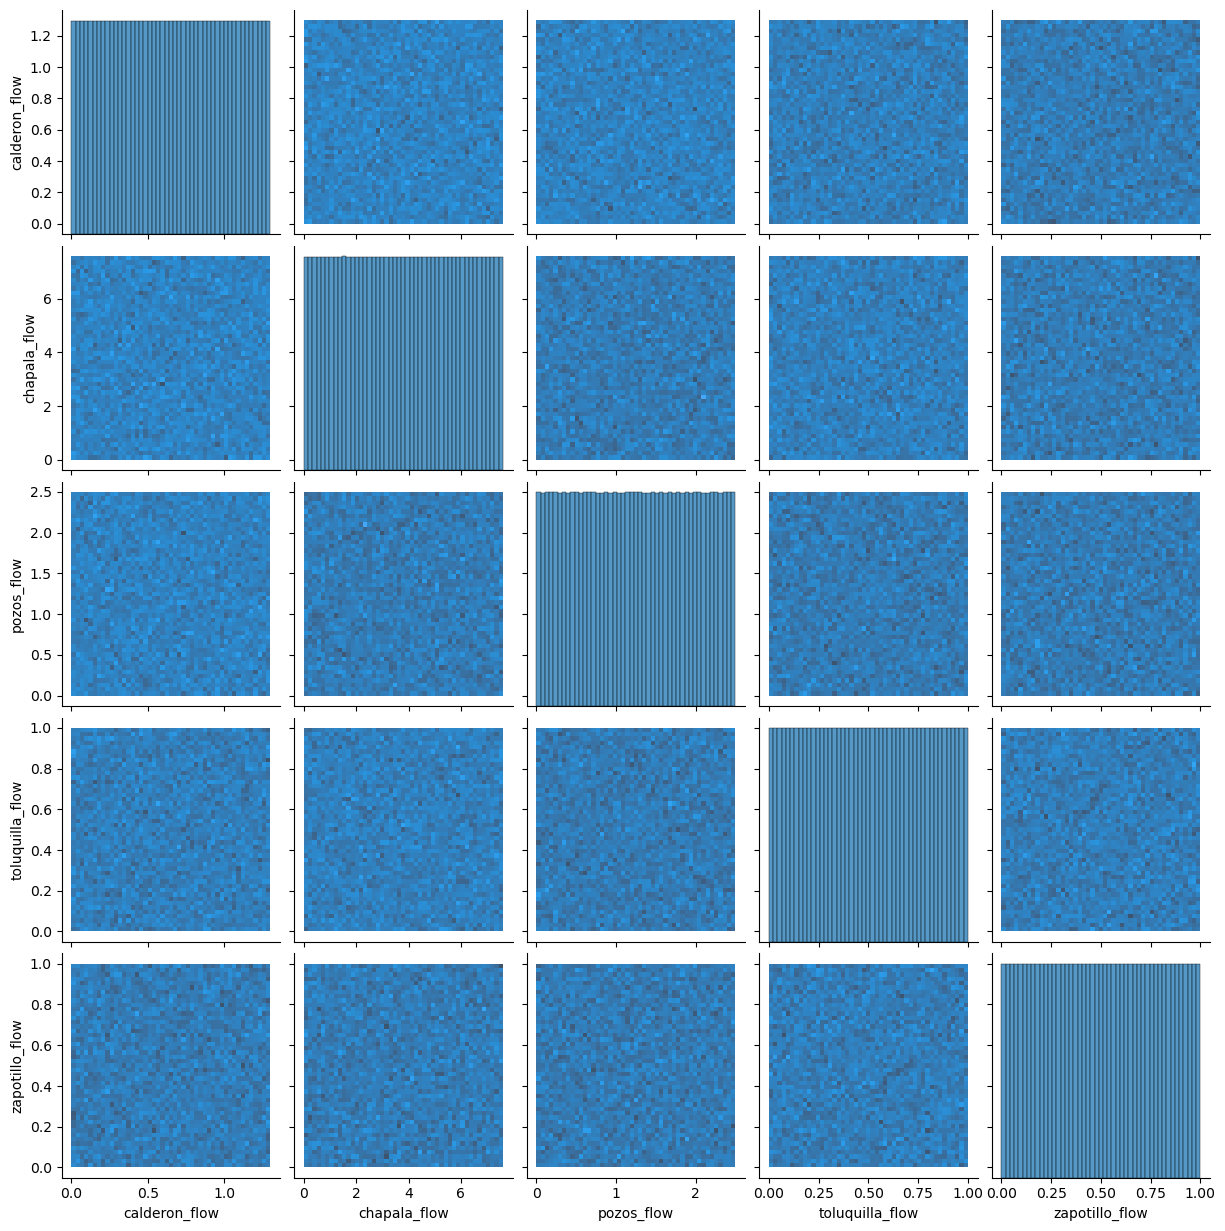

In [9]:
sns.pairplot(main_scenarios_df, kind="hist")

In [12]:
main_scenarios_df.to_csv(f"data/drought_scenarios_{n_scenarios} - seed{seed}.csv", index=False)

c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


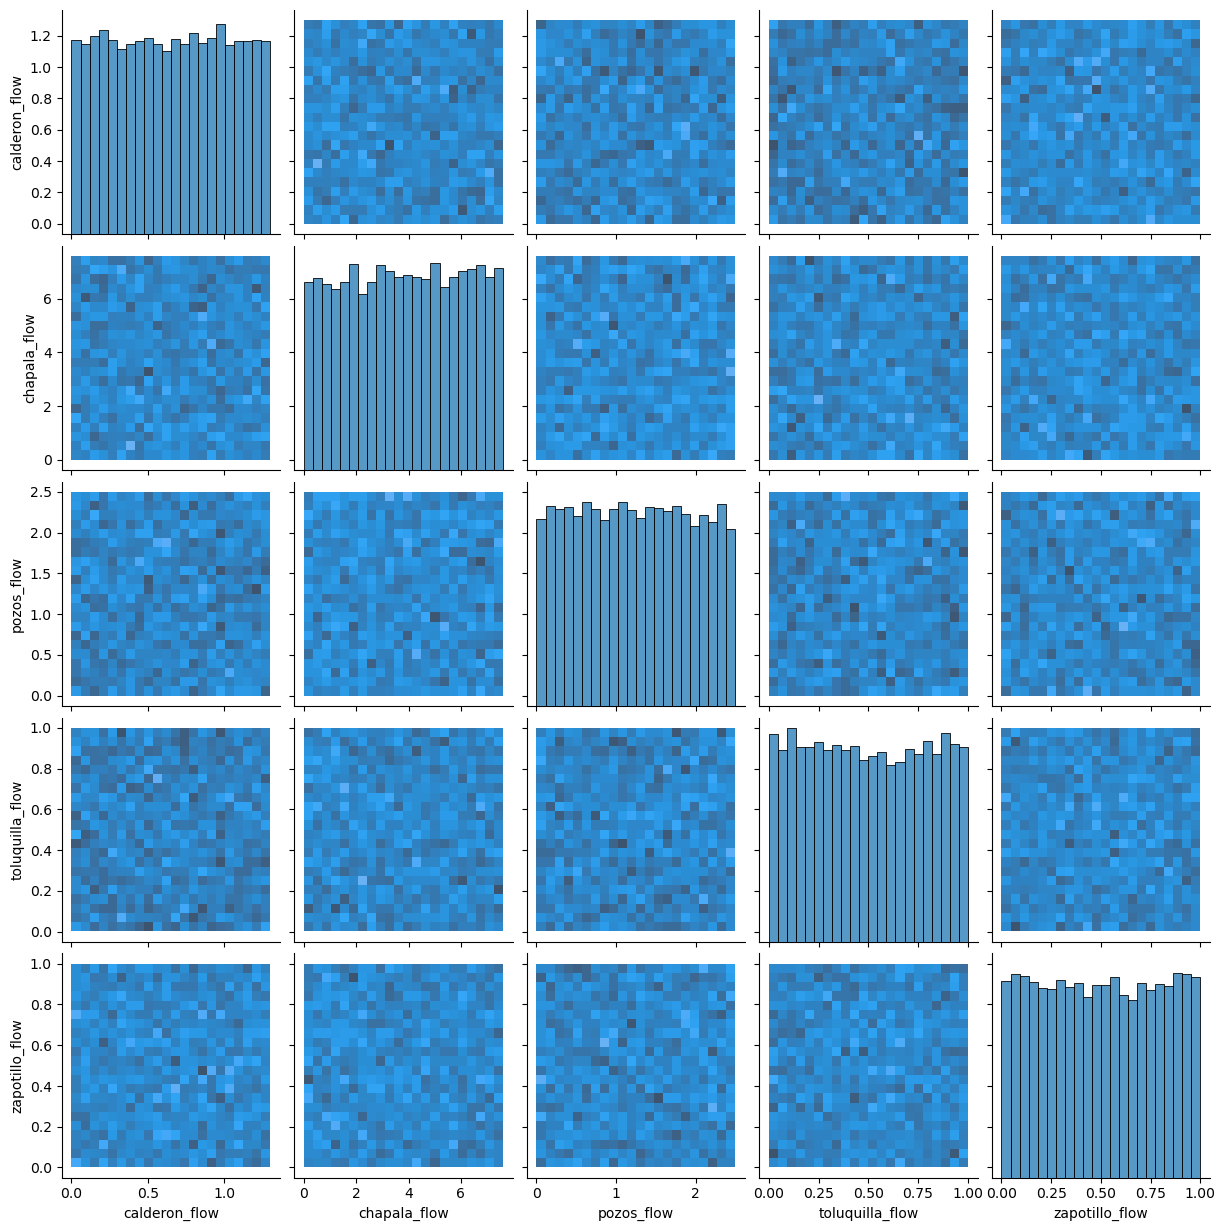

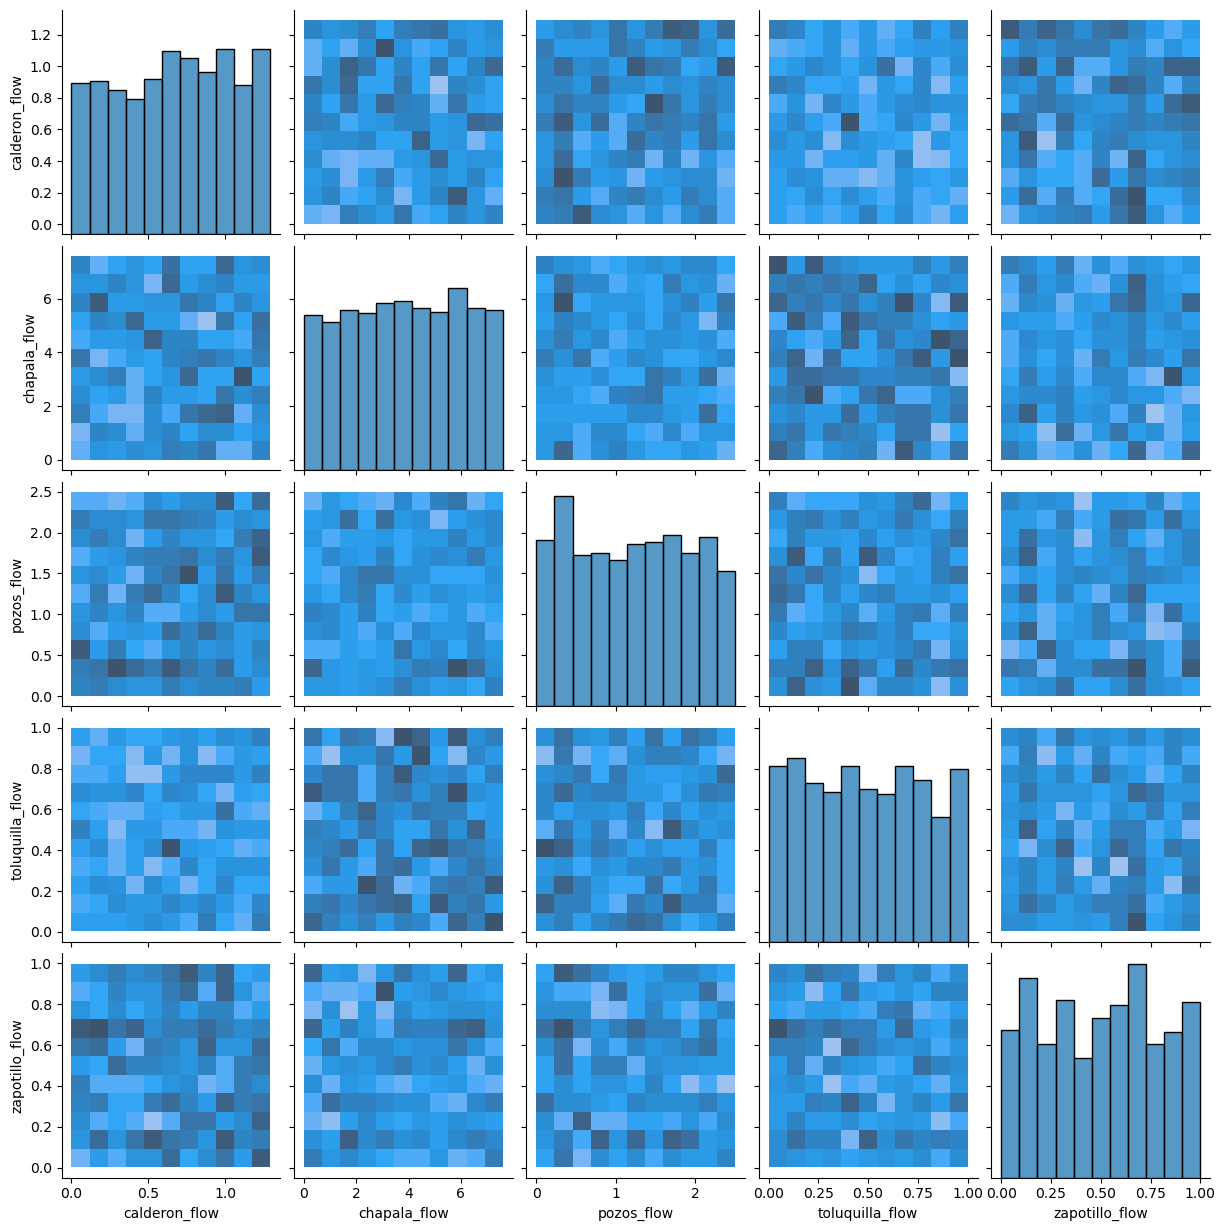

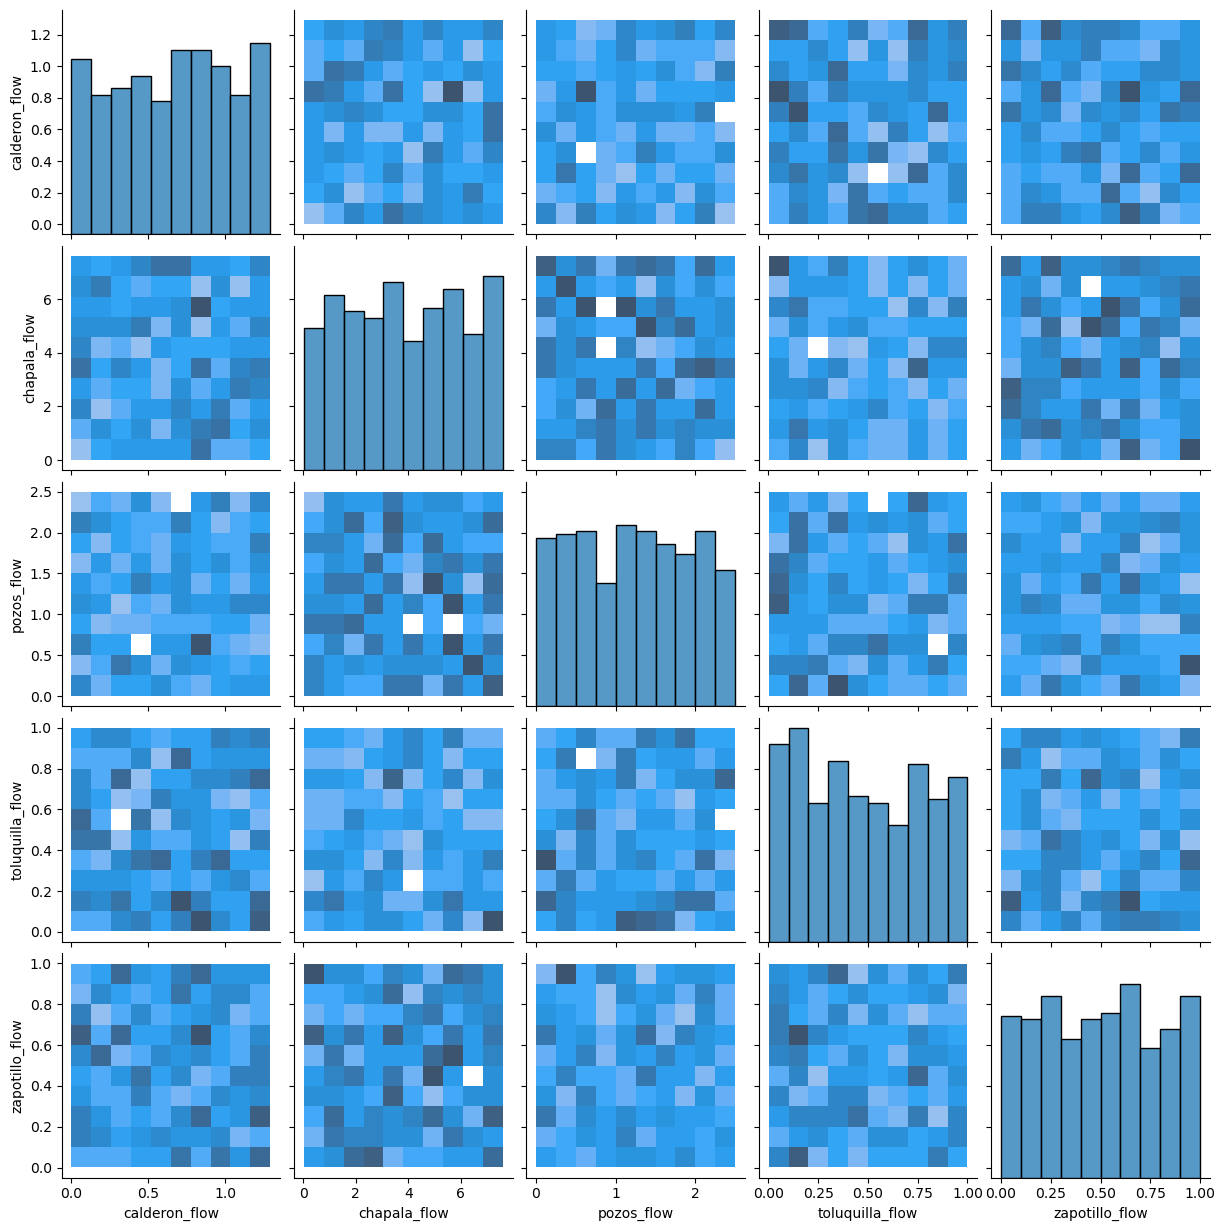

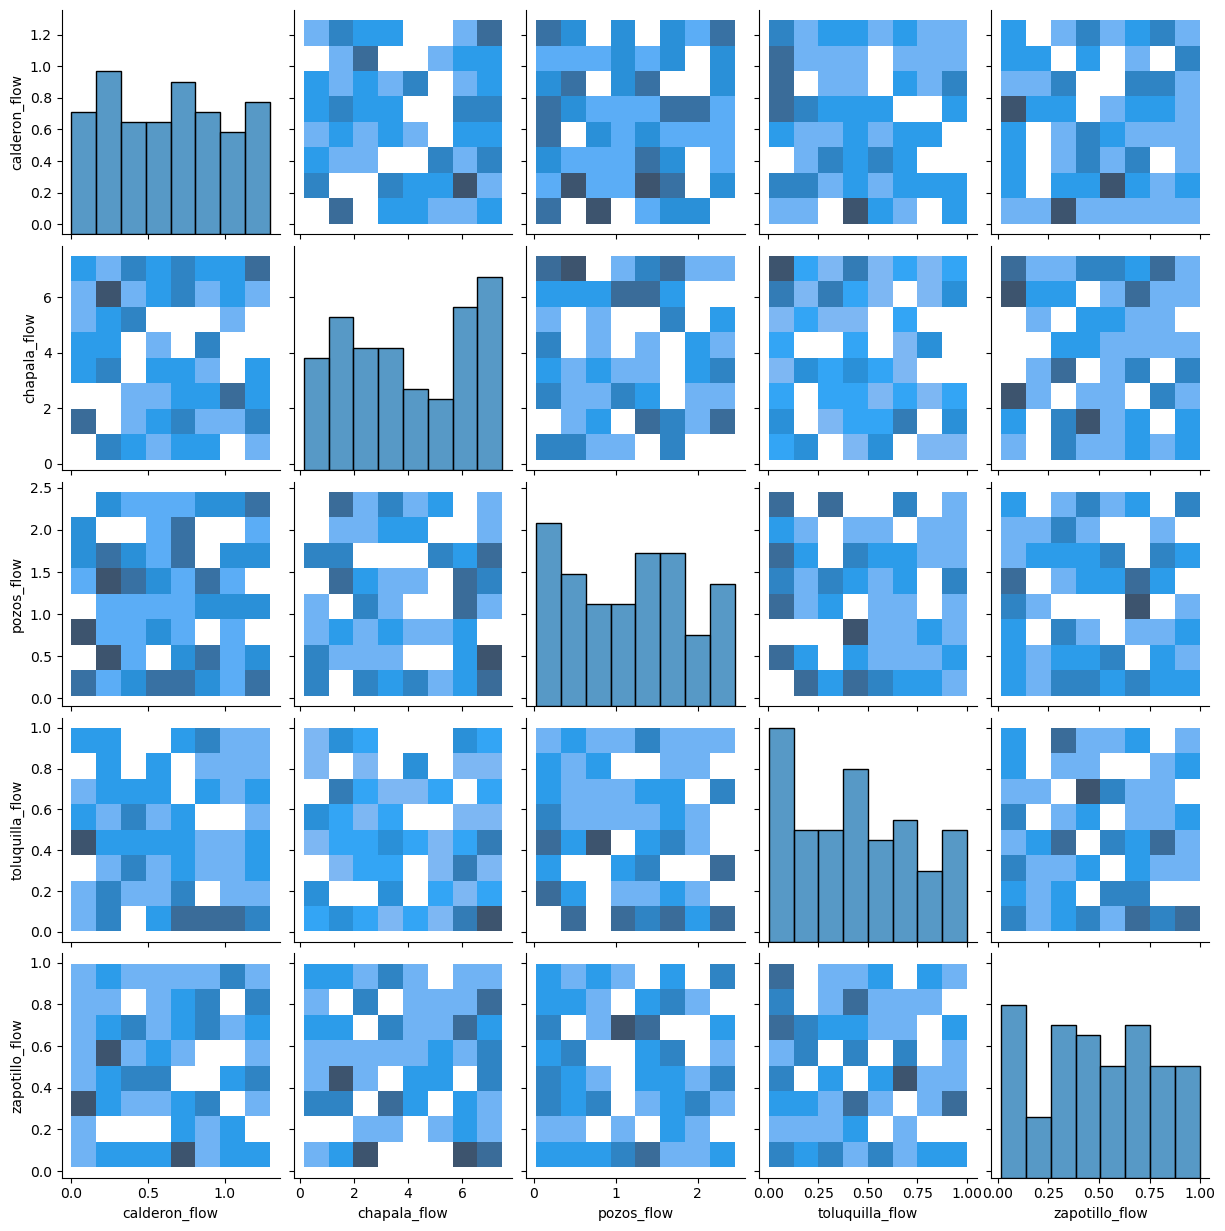

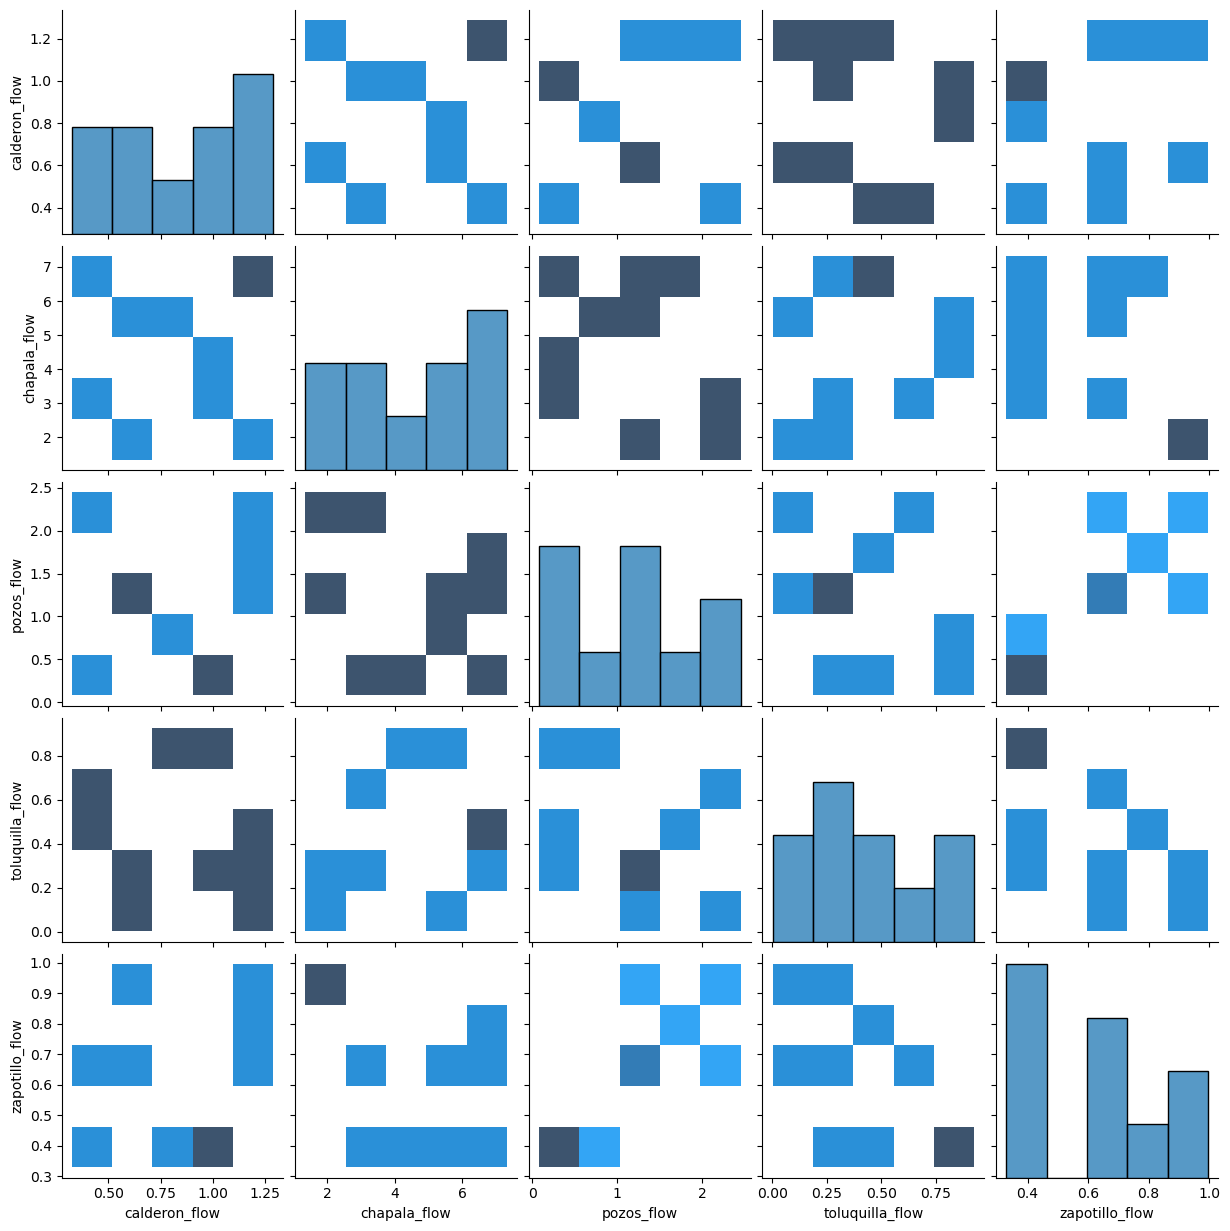

In [11]:
from ema_workbench import Samplers

samples_sizes = [10000, 1000, 500, 100, 10]

for size in samples_sizes:
    n_rand = 0 #a counter to facilitate seed analysis
    sample_df = main_scenarios_df.sample(size,random_state=np.random.seed(seed+n_rand))
    sample_df.to_csv(f"data/drought_scenarios_{size} - seed{seed}.csv", index=False)
    sns.pairplot(sample_df, kind="hist")